In [1]:
import json
import random
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from flask import Flask, render_template, jsonify

In [2]:
executable_path={'executable_path':ChromeDriverManager().install()}
browser=Browser('chrome',**executable_path, headless=False)

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [C:\Users\jlubr\.wdm\drivers\chromedriver\win32\88.0.4324.96\chromedriver.exe] found in cache


In [3]:
# This url is specific to this location for bottleking.
url='https://www.njlottery.com/en-us/drawgames/jerseycash.html'
browser.visit(url)

In [4]:
def read_cash5csv(cash5_df):
    try:
        cash5_df=pd.read_csv('cash5numbers.csv', index_col='date')
        print("In read cash5_df")
        return cash5_df
    except Exception as e:
        print("Exception error: ",e)
        return cash5_df

In [5]:
def create_cash5csv():
    cash5_df=pd.DataFrame(columns=['date','num1','num2','num3','num4','num5'])

    print("Scraping please be patient")

    html=browser.html
    soup=BeautifulSoup(html,'html.parser')
    winning_dates=soup.find_all('tr',{'data-toggle':['tableWinningNumbers']})
    est_jackpot=soup.find('div',{'class':['amount']}).text
    est_jackpot=est_jackpot.lstrip()
    print("Estimated Jackpot :",est_jackpot)
    for winning_date in winning_dates:
        date=winning_date.find('td',{'title':['date']})
        payout=winning_date.find('td',{'title':['5/5 Payout']})
        winning_payout=payout.find('span',{'class':['text-nowrap']}).text
        print("Winning payout :",winning_payout)
        numbers=winning_date.find_all('i',{'class':[""]})
        cash5numbers=[]
        for number in numbers:
            cash5numbers.append(number.text)
        cash5_df=cash5_df.append({
                'date':date.text,
                'num1':int(cash5numbers[0]),
                'num2':int(cash5numbers[1]),
                'num3':int(cash5numbers[2]),
                'num4':int(cash5numbers[3]),
                'num5':int(cash5numbers[4]),
        },ignore_index=True)
    cash5_df=cash5_df.set_index('date')
    print('Scraping Complete')
    cash5_df.to_csv("cash5numbers.csv",index=True, index_label='date')
    return cash5_df

In [6]:
def update_cash5csv(cash5_df):
    
    html=browser.html
    soup=BeautifulSoup(html,'html.parser')
    winning_dates=soup.find_all('tr',{'data-toggle':['tableWinningNumbers']})
    est_jackpot=soup.find('div',{'class':['amount']}).text
    est_jackpot=est_jackpot.lstrip()
    print('Estimated jackpot :',est_jackpot)
    for winning_date in winning_dates:
        date=winning_date.find('td',{'title':['date']})
        payout=winning_date.find('td',{'title':['5/5 Payout']})
        winning_payout=payout.find('span',{'class':['text-nowrap']}).text
        print("Winning payout :",winning_payout)
        try:
            rec=cash5_df.loc[date.text]
            break
        except:
            numbers=winning_date.find_all('i',{'class':[""]})
            cash5numbers=[]
            for number in numbers:
                print("number: ",number.text)
                cash5numbers.append(number.text)
            rec=pd.DataFrame({
                'num1':int(cash5numbers[0]),
                'num2':int(cash5numbers[1]),
                'num3':int(cash5numbers[2]),
                'num4':int(cash5numbers[3]),
                'num5':int(cash5numbers[4]),
            },index=[date.text])
            print ("rec: ",rec)
            cash5_df = pd.concat([rec, cash5_df], ignore_index=False)
    cash5_df=cash5_df.sort_index(axis=1)
    cash5_df.to_csv("cash5numbers.csv",index=True, index_label='date')
    return cash5_df    

In [7]:
def exists(numbers,results):
    row=0
    while (numbers.index[row] in results):
        row+=1
    results=results.append(numbers.index[row])
    return results

In [8]:
def oddeven(numbers,results,length,odd,even,count):
    row=0;
    oddcount=0
    evencount=0
    if (count):
        for number in results:
            if (number % 2 >0):
                oddcount+=1
            else:
                evencount+=1
    while (len(results)<length):
        if (numbers.index[row] % 2 > 0 and oddcount<odd and not(numbers.index[row] in results)):
            oddcount+=1
            results.append(numbers.index[row])
        elif (numbers.index[row] % 2 ==0 and evencount<even and not(numbers.index[row] in results)):
            evencount+=1
            results.append(numbers.index[row])
        row+=1
    return results

In [9]:
def generatecombo(odd,even,flag):
    
# flag=0 signifies that the odd numbers will be low <=22
# flag=1 signifies that the odd numbers will be high >=23

    ocount=0
    ecount=0
    results=[]
    
    while (len(results)<5):
        number=random.randint(1,45)
        if (flag==0):
            if ((number % 2 > 0) and (number <=22) and (ocount<odd) and not(number in results)):
                ocount+=1
                results.append(number)
            elif ((number % 2 == 0) and (number>=23) and (ecount<even) and not(number in results)):
                ecount+=1
                results.append(number)
        else:
            if ((number % 2 > 0) and (number>=23) and (ocount<odd) and not(number in results)):
                ocount+=1
                results.append(number)
            elif ((number % 2 ==0) and (number<=22) and (ecount<even) and not(number in results)):
                ecount+=1
                results.append(number)
    results.sort()
    return results   

In read cash5_df
Cash5 length: 417
File exists
Estimated jackpot : $ 236,000
                        
Winning payout : $ 0.00
number:  11
number:  15
number:  19
number:  21
number:  41
rec:              num1  num2  num3  num4  num5
02/22/2021    11    15    19    21    41
Winning payout : $ 0.00
Top 17 numbers : [5, 10, 15, 17, 18, 19, 21, 27, 28, 29, 41]
First highest Odd/Even pattern with most frequent numbers : [18, 19, 21, 28, 29]
Second highest Odd/Even pattern with most frequent numbers : [5, 15, 19, 21, 29]
Most frequent numbers picked from historical winning combos : [5, 15, 19, 21, 29]
Most frequent numbers picked in postion of combinations : [1, 9, 21, 29, 43]
Most frequent numbers in first highest Odd/Even pattern : [1, 9, 21, 34, 42]
Random numbers first highest Odd/Even pattern with odd numbers dominating the combination : [3, 5, 13, 26, 30]
Random numbers second highest Odd/Even pattern with odd numbers dominating the combination : [4, 10, 31, 33, 43]
Random numbers firs

<Figure size 1440x360 with 0 Axes>

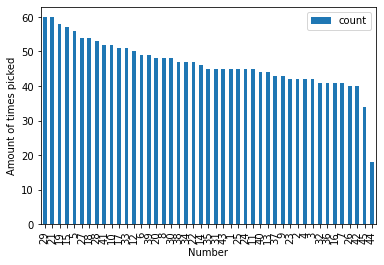

    count
num      
29     60
21     60
19     58
15     57
5      56
27     54
18     54
28     53
41     52
10     52
17     51
33     51
12     50
6      49
39     49
20     48
8      48
30     48
38     47
34     47
22     47
14     46
35     45
31     45
43     45
1      45
25     45
24     45
11     45
40     44
13     44
37     43
9      43
23     42
2      42
4      42
3      42
32     41
36     41
16     41
7      41
26     40
42     40
45     34
44     18


In [10]:
cash5_df=[]
cash5_df=read_cash5csv(cash5_df)
print("Cash5 length:",len(cash5_df))
if (len(cash5_df)==0):
    cash5_df=create_cash5csv()
else:
    print("File exists")
    cash5_df=update_cash5csv(cash5_df)
cash5_df

patterns_df=pd.DataFrame(
    [['05',0],
     ['14',0],
     ['23',0],
     ['32',0],
     ['41',0],
     ['50',0]],
    columns=['oddeven','count'])
patterns_df=patterns_df.set_index('oddeven')

lowhigh_df=pd.DataFrame(
    [['05',0],
     ['14',0],
     ['23',0],
     ['32',0],
     ['41',0],
     ['50',0]],
    columns=['lowhigh','count'])
lowhigh_df=lowhigh_df.set_index('lowhigh')

highest_cash5_number=45
frequency_df=pd.DataFrame(columns=['num','count'])
first_df=frequency_df
second_df=frequency_df
third_df=frequency_df
fourth_df=frequency_df
fifth_df=frequency_df
for number in range(highest_cash5_number):   
    frequency_df=frequency_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
    first_df=first_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
    second_df=second_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
    third_df=third_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
    fourth_df=fourth_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
    fifth_df=fifth_df.append({
        'num':number+1,
        'count':0,
    },ignore_index=True)
frequency_df=frequency_df.set_index('num')
first_df=first_df.set_index('num')
second_df=second_df.set_index('num')
third_df=third_df.set_index('num')
fourth_df=fourth_df.set_index('num')
fifth_df=fifth_df.set_index('num')

todd=0
teven=0
for date in cash5_df.index:
    odd=0
    even=0
    low=0
    high=0
    frequency_df['count'][int(cash5_df['num1'][date])]+=1
    frequency_df['count'][int(cash5_df['num2'][date])]+=1
    frequency_df['count'][int(cash5_df['num3'][date])]+=1
    frequency_df['count'][int(cash5_df['num4'][date])]+=1
    frequency_df['count'][int(cash5_df['num5'][date])]+=1
    first_df['count'][int(cash5_df['num1'][date])]+=1
    second_df['count'][int(cash5_df['num2'][date])]+=1
    third_df['count'][int(cash5_df['num3'][date])]+=1
    fourth_df['count'][int(cash5_df['num4'][date])]+=1
    fifth_df['count'][int(cash5_df['num5'][date])]+=1

    if (int(cash5_df['num1'][date]) % 2) >0 :
        odd+=1
    else:
        even+=1
    if (int(cash5_df['num2'][date]) % 2) >0 :
        odd+=1
    else:
        even+=1
    if (int(cash5_df['num3'][date]) % 2) >0 :
        odd+=1
    else:
        even+=1
    if (int(cash5_df['num4'][date]) % 2) >0 :
        odd+=1
    else:
        even+=1
    if (int(cash5_df['num5'][date]) % 2) >0 :
        odd+=1
    else:
        even+=1
    key=str(odd)+str(even)
    patterns_df['count'][key]+=1
    todd=todd+odd
    teven=teven+even
    
    if (int(cash5_df['num1'][date]) <=22):
        low+=1
    else:
        high+=1
    if (int(cash5_df['num2'][date]) <=22):
        low+=1
    else:
        high+=1
    if (int(cash5_df['num3'][date]) <=22):
        low+=1
    else:
        high+=1
    if (int(cash5_df['num4'][date]) <=22):
        low+=1
    else:
        high+=1
    if (int(cash5_df['num5'][date]) <=22):
        low+=1
    else:
        high+=1

    key=str(low)+str(high)
    lowhigh_df['count'][key]+=1
    
patterns_df=patterns_df.sort_values(by=['count'], ascending=False)
lowhigh_df=lowhigh_df.sort_values(by=['count'], ascending=False)
frequency_df=frequency_df.sort_values(by=['count'], ascending=False)

results=[]
allresults=[]
odd1=int(patterns_df.index[0][0])
even1=int(patterns_df.index[0][1])
allresults.append(oddeven(frequency_df,results,5,odd1,even1,0))

results=[]
odd2=int(patterns_df.index[1][0])
even2=int(patterns_df.index[1][1])
allresults.append(oddeven(frequency_df,results,5,odd2,even2,0))

results[0]=frequency_df.index[0]
results[1]=frequency_df.index[1]
results[2]=frequency_df.index[2]
results[3]=frequency_df.index[3]
results[4]=frequency_df.index[4]
results.sort()
allresults.append(results)

first_df=first_df.sort_values(by=['count'], ascending=False)
second_df=second_df.sort_values(by=['count'], ascending=False)
third_df=third_df.sort_values(by=['count'], ascending=False)
fourth_df=fourth_df.sort_values(by=['count'], ascending=False)
fifth_df=fifth_df.sort_values(by=['count'], ascending=False)

results=[]
exists(first_df,results)
exists(second_df,results)
exists(third_df,results)
exists(fourth_df,results)
exists(fifth_df,results)
results.sort()
allresults.append(results)

results=[]
results=oddeven(first_df,results,1,odd1,even1,1)
results=oddeven(second_df,results,2,odd1,even1,1)
results=oddeven(third_df,results,3,odd1,even1,1)
results=oddeven(fourth_df,results,4,odd1,even1,1)
allresults.append(oddeven(fifth_df,results,5,odd1,even1,1))

allresults.append((generatecombo(odd1,even1,0)))
allresults.append((generatecombo(odd1,even1,1)))
allresults.append((generatecombo(odd2,even2,0)))
allresults.append((generatecombo(odd2,even2,1)))

info={}
allresults_dict=[]
for result in allresults:
    result.sort()
    info = {
        "first":str(result[0]),
        "second":str(result[1]),
        "third":str(result[2]),
        "fourth":str(result[3]),
        "fifth":str(result[4]),
    }
    allresults_dict.append(info)

lotterywheelnumbers=[]
for x in range(11):
    lotterywheelnumbers.append(frequency_df.index[x])
lotterywheelnumbers.sort()
print("Top 17 numbers :",lotterywheelnumbers)
print("First highest Odd/Even pattern with most frequent numbers :", allresults[0])
print("Second highest Odd/Even pattern with most frequent numbers :", allresults[1])
print("Most frequent numbers picked from historical winning combos :",allresults[2])
print("Most frequent numbers picked in postion of combinations :",allresults[3])
print("Most frequent numbers in first highest Odd/Even pattern :", allresults[4])
print("Random numbers first highest Odd/Even pattern with odd numbers dominating the combination :", allresults[5])
print("Random numbers second highest Odd/Even pattern with odd numbers dominating the combination :", allresults[6])
print("Random numbers first highest Odd/Even pattern with even numbers dominating the combination :", allresults[7])
print("Random numbers second highest Odd/Even pattern with even numbers dominating the combination :", allresults[8])

plt.figure(figsize=(20, 5))
number_chart=frequency_df.plot(kind='bar')
number_chart.set_xlabel("Number")
number_chart.set_ylabel("Amount of times picked")
plt.show()

print(frequency_df)

In [11]:
lowhigh_df

,count
lowhigh,
32,148
23,122
41,70
14,63
05,9
50,6


In [12]:
patterns_df

,count
oddeven,
32,139
23,132
41,71
14,47
50,19
05,10


In [16]:
low_odd_nbrs=[1,3,5,7,9,11,13,15,17,19,21]
low_even_nbrs=[2,4,6,8,10,12,14,16,18,20,22]
high_odd_nbrs=[23,25,27,29,31,33,35,37,39,41,43,45]
high_even_nbrs=[24,26,28,30,32,34,36,38,40,42,44]

pattern={'num1':{'odd':0,'even':0,'low':0,'high':0},
         'num2':{'odd':0,'even':0,'low':0,'high':0},
         'num3':{'odd':0,'even':0,'low':0,'high':0},
         'num4':{'odd':0,'even':0,'low':0,'high':0},
         'num5':{'odd':0,'even':0,'low':0,'high':0}}

test_df=cash5_df.reset_index(drop=True)
test_df.head(10)
for row in range(len(test_df)-1):
    for number in (['num1', 'num2', 'num3','num4','num5']):
        nbr=int(test_df.iloc[row, [test_df.columns.get_loc(number)]])
        if (nbr % 2 != 0):
            if (nbr <=21):
                pattern[number]['odd']+=1
                pattern[number]['low']+=1

            else:
                pattern[number]['odd']+=1
                pattern[number]['high']+=1
        else:
            if (nbr<=22):
                pattern[number]['even']+=1
                pattern[number]['low']+=1
            else:
                pattern[number]['even']+=1
                pattern[number]['high']+=1

result=[]
for number in (['num1','num2','num3','num4','num5']):
    if (pattern[number]['odd'] >= pattern[number]['even']): 
        if (pattern[number]['low'] >= pattern[number]['high']):
            nbr=random.sample(low_odd_nbrs,1)
            result.append(nbr[0])
            low_odd_nbrs.remove(nbr[0])
        else:
            nbr=random.sample(high_odd_nbrs,1)
            result.append(nbr[0])
            high_odd_nbrs.remove(nbr[0])
    else:
        if (pattern[number]['low'] > pattern[number]['high']):
            nbr=random.sample(low_even_nbrs,1)
            result.append(nbr[0])
            low_even_nbrs.remove(nbr[0])
        else:
            nbr=random.sample(high_even_nbrs,1)
            result.append(nbr[0])
            high_even_nbrs.remove(nbr[0])

print("pattern :",pattern)
print("results :",result)
result.sort()
print("sorted results :",result)

pattern : {'num1': {'odd': 224, 'even': 193, 'low': 408, 'high': 9}, 'num2': {'odd': 207, 'even': 210, 'low': 345, 'high': 72}, 'num3': {'odd': 207, 'even': 210, 'low': 224, 'high': 193}, 'num4': {'odd': 232, 'even': 185, 'low': 76, 'high': 341}, 'num5': {'odd': 234, 'even': 183, 'low': 6, 'high': 411}}
results : [19, 10, 20, 45, 37]
sorted results : [10, 19, 20, 37, 45]
